# Übungsblatt 4

Lernziele:
- Klassifikation mit Support Vector Machines (SVM)



In [1]:
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'X', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # transform labels into numbers
    le = preprocessing.LabelEncoder()
    le.fit(y)

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = le.transform(Z)
    Z = Z.reshape(xx1.shape)

    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=[cmap(idx)],
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

Schritt 1: Lesen Sie die Trainings-Daten aus 'data/2d_samples.csv' ein!

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("data/2d_samples.csv")
df

,x1,x2,Label
0,30.5905,11.30740,A
1,28.6456,10.42340,A
2,28.2756,10.18550,A
3,25.9744,8.50403,A
4,28.5634,10.92670,A
...,...,...,...
1495,29.6511,9.23666,B
1496,31.9667,10.39530,B
1497,31.4926,9.90862,B
1498,27.8434,8.92265,B


Schritt 2: Trainieren Sie eine Support Vector Machine mit linearem Kernel. Verwenden Sie hierbei das Modul SciKit Learn (sklearn). Überprüfen Sie den Klassifikator, indem Sie die Muster der Trainingsstichprobe klassifizieren.

In [4]:
from sklearn.svm import SVC

svm = SVC(kernel="linear", C=100.0, random_state=42)
svm

SVC(C=100.0, kernel='linear', random_state=42)

In [5]:
values = df[["x1", "x2"]].values
values[:10]

array([[30.5905 , 11.3074 ],
       [28.6456 , 10.4234 ],
       [28.2756 , 10.1855 ],
       [25.9744 ,  8.50403],
       [28.5634 , 10.9267 ],
       [28.5366 ,  9.80009],
       [28.6979 ,  9.89202],
       [28.7661 , 10.9646 ],
       [26.9512 ,  9.28147],
       [29.1667 , 10.6821 ]])

In [6]:
labels = df["Label"]
labels[:10]

0    A
1    A
2    A
3    A
4    A
5    A
6    A
7    A
8    A
9    A
Name: Label, dtype: object

In [7]:
svm.fit(values, labels)

SVC(C=100.0, kernel='linear', random_state=42)

In [8]:
predictions = svm.predict(values)
correct = np.sum(predictions == labels)
num_samples = len(labels)
correct_percentage = correct / num_samples
print(f"Correct: {correct}; Percentage correct classified: {correct_percentage}") 

Correct: 1487; Percentage correct classified: 0.9913333333333333


Schritt 3: Plotten Sie das Ergebnis der Klassifikation mit Hilfe der oben zur Verfügung gestellten Funktion *plot_decision_regions()*

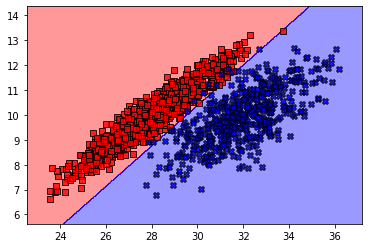

In [9]:
plot_decision_regions(np.array(values), np.array(labels), svm)